# Background Data

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# Import the libraries

In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Data exploration

### Specify the size of plot

In [26]:
HEIGHT = 500
WIDTH = 700
NBINS = 50
SCATTER_SIZE=700

### Return the head of the data

In [27]:
heart_data = pd.read_csv("/home/yuxuan/kaggle/heart_failure_clinical_records_dataset.csv")
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Return the summary of the data

In [28]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Return the size of the data

In [29]:
print(heart_data.shape)

(299, 13)


Let's check the ratio of the NaNs for every columns

In [30]:
for col in heart_data.columns:
    print(col, str(round(100* heart_data[col].isnull().sum() / len(heart_data), 2)) + '%')

age 0.0%
anaemia 0.0%
creatinine_phosphokinase 0.0%
diabetes 0.0%
ejection_fraction 0.0%
high_blood_pressure 0.0%
platelets 0.0%
serum_creatinine 0.0%
serum_sodium 0.0%
sex 0.0%
smoking 0.0%
time 0.0%
DEATH_EVENT 0.0%


As can be seen the head of the data, there are 13 dimensions and 299 samples.
All the columns are devoid of NaNs.
We need make some rules before the data processing

- Sex - Gender of patient Male = 1, Female =0
- Age - Age of patient
- Diabetes - 0 = No, 1 = Yes
- Anaemia - 0 = No, 1 = Yes
- High_blood_pressure - 0 = No, 1 = Yes
- Smoking - 0 = No, 1 = Yes
- DEATH_EVENT - 0 = No, 1 = Yes

#### Patients age distribution with gender

In [31]:
def plot_histogram(dataframe, column, color, bins, marginal,title, width=WIDTH, height=HEIGHT):
    figure = px.histogram(
        dataframe,
        column,
        color=color,
        nbins=bins,
        marginal= marginal,
        title=title,
        width=width,
        height=height
    )
    figure.show()

In [32]:
plot_histogram(heart_data, 'age', 'sex', NBINS, "violin",'Figure 1: Patients age distribution with gender')

Wider section of the violin plot represent a higher probability of observations
taking a given value, the thinner sections corresponding a lower probability and
the value of probability is given by kde value (Kernel Density Estimation) for given x

Figure 1:
- Most patients' age ranged from 40 to 80
- Only a small amount of patients were smaller than 40 or older than 80

#### Box plot of gender and age distribution

In [33]:
def plot_boxplot(dataframe, x, y,points,title,width=WIDTH, height=HEIGHT):
    figure = px.box(
        dataframe,
        x=x,
        y=y,
        points=points,
        title=title,
        width=width,
        height=height
    )
    figure.show()

In [34]:
# plot_boxplot(heart_data, 'sex', 'age', None,'Figure 3: Box plot of patients\' age distribution with death event')
plot_boxplot(heart_data, 'sex', 'age', "all",'Figure 2: Box plot of patients\' age distribution with gender <br> '
                                             'Male = 1 Female = 0')

### Analysis on survival rate with different factors

#### Analysis of age distribution in death event

In [35]:
plot_histogram(heart_data, 'age', 'DEATH_EVENT', NBINS, "violin",'Figure 3: Patients age distribution with death event')

In [36]:
male = heart_data[heart_data["sex"]==1]
female = heart_data[heart_data["sex"]==0]
male_survival= male[male["DEATH_EVENT"]==0]
female_survival= female[female["DEATH_EVENT"]==0]
## assign the labels
labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
## value is set according to the labels
values = [len(male[heart_data["DEATH_EVENT"]==0]),len(male[heart_data["DEATH_EVENT"]==1]),
         len(female[heart_data["DEATH_EVENT"]==0]),len(female[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_layout(
    title_text = "Figure 4: Analysis on Survival - Gender factor"
)
fig.show()

/home/yuxuan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/yuxuan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Based on Figure 4, there is no clear patterns or association between gender factor and death rate.
Males and females seem to have the similar mortality/survival rate 

#### Analysis of the combination of gender and age factors between the survival status (Violin plot)

In [37]:
## Define the violin plot function method
def violin_boxplot(dataframe, x, y,color,points,hover_data, box, width=WIDTH, height=HEIGHT):
    figure = px.violin(
        dataframe,
        x=x,
        y=y,
        color = color,
        box = box,
        hover_data=hover_data,
        points=points,
        width=width,
        height=height
    )
    figure.update_layout(title_text="Figure 5: Analysis of both gender and age factors in survival rates")
    figure.show()
    

In [38]:
violin_boxplot(heart_data,x = "sex",y="age",color="DEATH_EVENT",points="all",box=True,hover_data=heart_data.columns)

Figure 5 illustrate that:
- The survival rate is high in male between 50-60 ages, while female's survival rate is high between 60-70 ages

#### Analysis of serum_creatinine in survival status

In [39]:
plot_histogram(heart_data, 'serum_creatinine', 'DEATH_EVENT', NBINS, "violin",'Figure 6: Distribution of serum creatinine VS death event')

#### Analysis of serum_sodium in survival status

In [40]:
plot_histogram(heart_data, 'serum_sodium', 'DEATH_EVENT', NBINS, "violin",'Figure 7: Distribution of serum sodium VS death event')

#### Analysis of platelets in survival status

In [41]:
plot_histogram(heart_data, 'platelets', 'DEATH_EVENT', NBINS, "violin",'Figure 8: Distribution of platelets VS death event')

#### Analysis of ejection fraction in survival status

In [42]:
plot_histogram(heart_data, 'ejection_fraction', 'DEATH_EVENT', NBINS, "violin",'Figure 9: Distribution of ejection fraction VS death event')

#### Analysis of creatinine phosphokinase in survival status

In [43]:
plot_histogram(heart_data, 'creatinine_phosphokinase', 'DEATH_EVENT', NBINS, "violin",'Figure 10: Distribution of creatinine_phosphokinase VS death event')

In [44]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Correlation Matrix

Exclude the column in time. The reason for doing that is 'time' stands for the follw-up periods. It is obvious that follow-up periods will have no influence on heart failure condition. 

In [45]:
heart_data = heart_data.drop(['time'],axis=1)
# heart_data.columns

#### Visualized the correlation matrix in a heatmap format

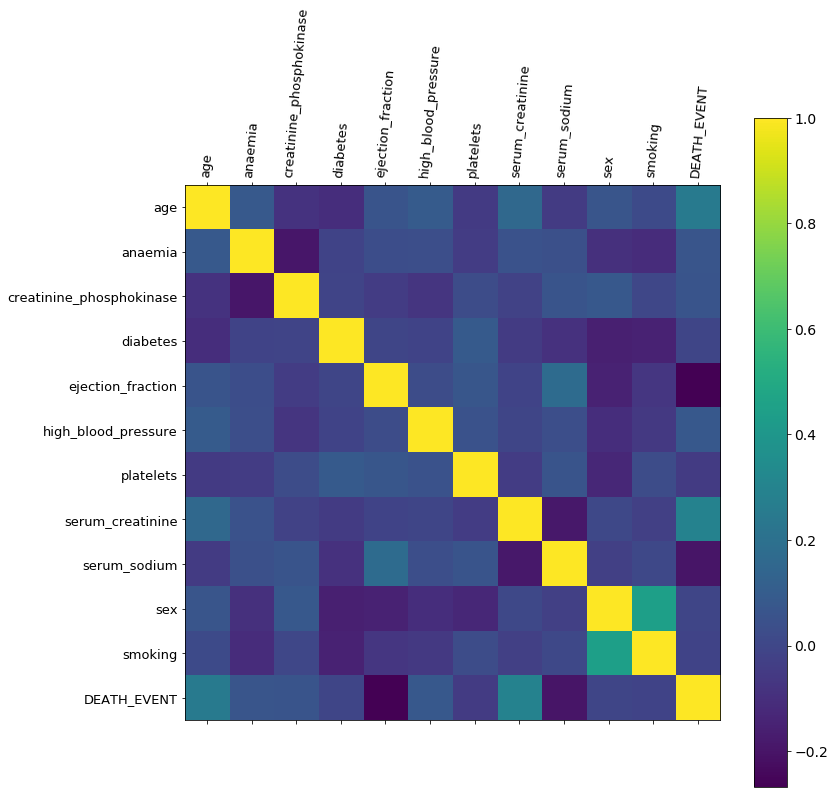

In [46]:
f = plt.figure(figsize=(12,12))
plt.matshow(heart_data.corr(),fignum=f.number)
plt.xticks(range(heart_data.shape[1]),heart_data.columns, fontsize=13,rotation=85)
plt.yticks(range(heart_data.shape[1]),heart_data.columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [44]:
plot_histogram(heart_data, 'ejection_fraction', 'DEATH_EVENT', NBINS, "violin",'Figure 9: Distribution of ejection fraction VS death event')

#### Analysis of creatinine phosphokinase in survival status

In [45]:
plot_histogram(heart_data, 'creatinine_phosphokinase', 'DEATH_EVENT', NBINS, "violin",'Figure 10: Distribution of creatinine_phosphokinase VS death event')

In [39]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


### Correlation Matrix

Exclude the column in time. The reason for doing that is 'time' stands for the follw-up periods. It is obvious that follow-up periods will have no influence on heart failure condition. 

In [15]:
heart_data = heart_data.drop(['time'],axis=1)
# heart_data.columns

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


#### Visualized the correlation matrix in a heatmap format

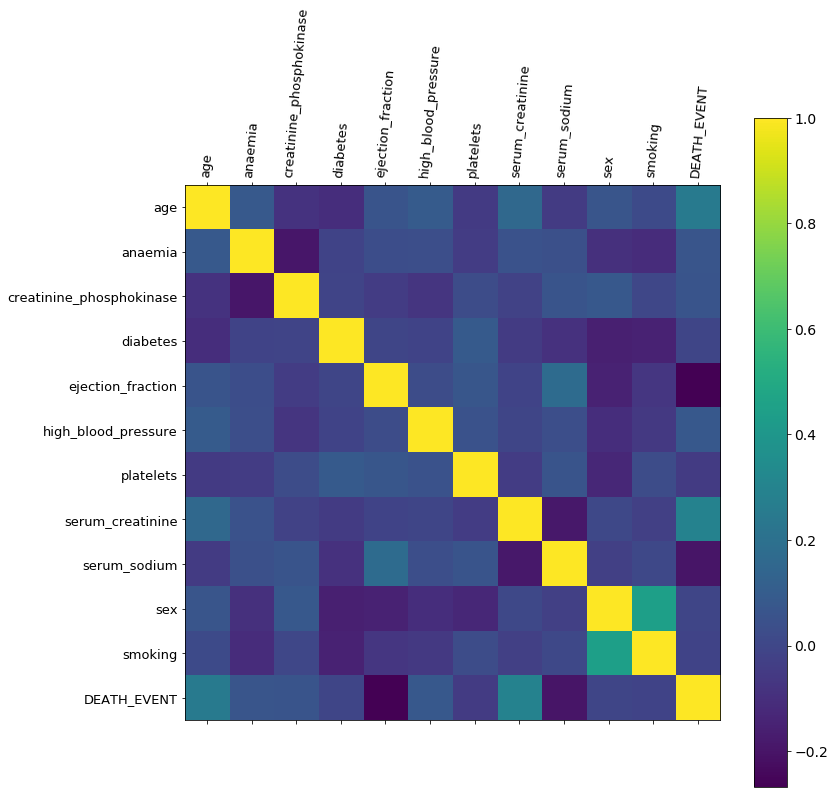

In [32]:
f = plt.figure(figsize=(12,12))
plt.matshow(heart_data.corr(),fignum=f.number)
plt.xticks(range(heart_data.shape[1]),heart_data.columns, fontsize=13,rotation=85)
plt.yticks(range(heart_data.shape[1]),heart_data.columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)